# Quickstart
The easiest way to get started is by using the {class}`~fastdfe.base_inference.BaseInference` class which infers the DFE from a single pair of frequency spectra, one `neutral` and one `selected`. In this example we create {class}`~fastdfe.spectrum.Spectrum` objects holding the SFS counts and pass them to {class}`~fastdfe.base_inference.BaseInference`. Note that we are required to specify the number of monomorphic sites (the last and first entries of the specified counts which correspond to the number of mono-allelic sites where the ancestral and derived allele is fixed, respectively). By default, only the deleterious part of the DFE is inferred (cf. {attr}`~fastdfe.base_inference.BaseInference.fixed_params`).

In [11]:
library(fastdfe)

# load the fastdfe package
fd <- load_fastdfe()

In [17]:
setwd("/Users/au732936/PycharmProjects/fastDFE")
reticulate::use_condaenv("/Users/au732936/miniconda3/envs/dev-r-fastdfe", required = TRUE)
source("R/fastdfe.R")
fd <- load_fastdfe()

In [18]:
# configure inference
inf <- fd$BaseInference(
  sfs_neut = fd$Spectrum(c(177130, 997, 441, 228, 156, 117, 114, 83, 105, 109, 0)),
  sfs_sel = Spectrum(c(797939, 1329, 499, 265, 162, 104, 117, 90, 94, 119, 0)),
  do_bootstrap = False
)

# run inference
sfs_models <- fd$BaseInference$run(inf)

fastDFE uses maximum likelihood estimation (MLE) to find the DFE. By default, 10 local optimization runs are carried out to make sure a reasonably good global optimum has been bound. The DFE furthermore needs to parametrized where {class}`~fastdfe.parametrization.GammaExpParametrization` is used by default. We also report the standard deviation across optimization runs to give an idea of the reliability of the estimates. In this case, the standard deviations are low, indicating that the estimates are stable.

We can now plot the inferred DFE in discretized form (cf. {func}`~fastdfe.base_inference.BaseInference.plot_discretized`).

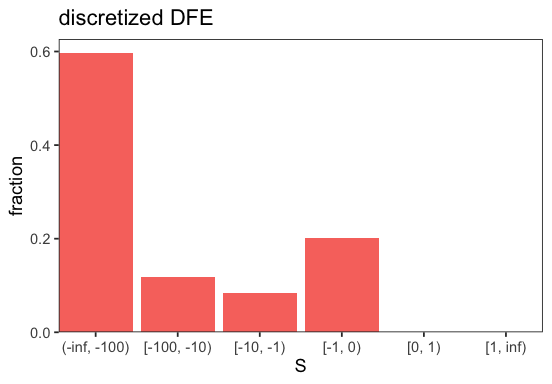

In [19]:
p <- fd$BaseInference$plot_discretized(inf)

We can also plot a comparison of the `selected` modelled and observed SFS (cf. {func}`~fastdfe.base_inference.BaseInference.plot_sfs_comparison`).

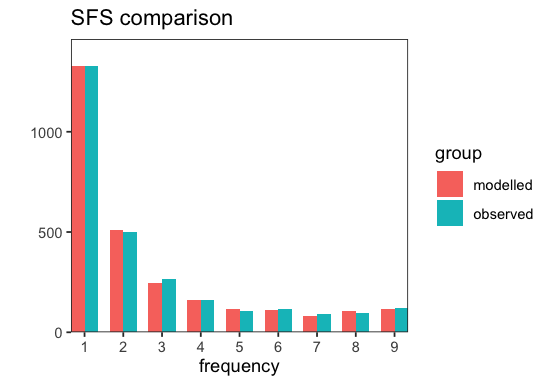

In [20]:
p <- fd$BaseInference$plot_sfs_comparison(inf)

## Bootstrapping

To quantify uncertainly we can perform parametric bootstrapping (cf. {func}`~fastdfe.base_inference.BaseInference.bootstrap`)

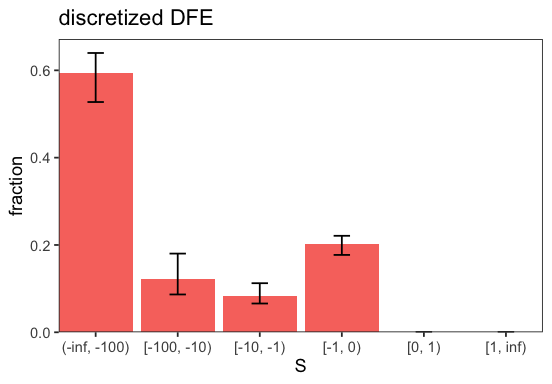

In [21]:
bs <- inf$bootstrap()

# redo the plotting
p <- fd$BaseInference$plot_discretized(inf)

By default, we perform 2 optimization runs per bootstrap sample taking the best result (cf. {attr}`~fastdfe.base_inference.BaseInference.n_bootstrap_retries`). The standard deviation across runs is computed for each bootstrap sample, and the average of these standard deviations across all samples is reported to summarize the uncertainty of the bootstrap estimates. In this case, we can see that the uncertainty is quite low indicating reliable bootstrap estimates.